
<center> <h1> <font color='blue'> Notebook 1: " About the project and explorating the data" </font> </h1>  <h2> Group 4 </h2> </center>

<h3> Group members : </h3> 
<br>

        Amine BEN MOUSSA
        Ahlem JOUIDI 
        Firas OMRANE
        Ramzi HAMDI
        Siwar ABBES


## Plan of this notebook : 

1. [About the project](#1)  <br>
<br>
2. [Reduced Data](#2) <br>
<br>
3. [Distribution of responses in France (MAP)](#3) <br>
<br>
4. [Preprocessing](#4) <br>
<br>
    
    4.1 [['Tokenize', 'the', 'data']](#4.1) <br>
    4.2 [Stopwords removal](#4.2) <br>
    4.3 [Lemmatization with nltk](#4.3) <br>
<br>
5. [EDA: Exploratory data analysis](#5) <br>
<br>
    
    5.1 [Word cloud ](#5.1) <br>
    5.2 [Plotting the most common sequences](#5.2) <br>
<br>
6. [Analyse Title Column](#6) <br>
<br>
7. [Analyse problems Column](#7) <br>
<br>
8. [Analyse Response_problems Column](#8) <br>

    



<a class="anchor" id="1"></a> 

## 1. About the project

In this project, we will explore the "LA_TRANSITION_ECOLOGIQUE " data and try to get useful informations from it. 
<br>
<br>
As a first step, the main goal of our project is to develop a model that will be able to extract the major ecological topics people discussed about (in our data) then we will extract the major problems of each region in France and after that we will focus on their suggestion to resolve these problems.
<br>
<br>
Later, we plan to predict the missing answers of the 5th question which is a yes/no question and this based on the answers of opened questions.

<br>
In this notebook,we will ilustrate the distribution in France of several responses of questions. Then, we will detail the preprocessing for the reduced data that we will work on later. After that, we will plot the most commun sequences for the selected data.

## Librairies

In [1]:
import pandas as pd
import numpy as np
import os
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
from collections import Counter
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
stemmer = FrenchStemmer()
from nltk.stem.snowball import FrenchStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install wordcloud
from gensim import matutils, models
import scipy.sparse
from keras.preprocessing.text import Tokenizer
import folium
import pickle
from folium.plugins import HeatMap
import glob
import matplotlib.dates as mdates
import datetime as dt

nltk.download('wordnet')
# spacy for lemmatization
import spacy
!python -m spacy download fr

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/siwarabbes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siwarabbes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading BokehJS ...

Using TensorFlow backend.


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/siwarabbes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
✔ Linking successful
/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/fr_core_news_sm -->
/Users/siwarabbes/anaconda3/lib/python3.7/site-packages/spacy/data/fr
You can now load the model via spacy.load('fr')


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import data

In [3]:
# we will explore the "LA_TRANSITION_ECOLOGIQUE " data and try to get useful informations from it. 
environment_pd = pd.read_csv('LA_TRANSITION_ECOLOGIQUE.csv', low_memory=False)
environment_pd.head()

,id,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,...,"QUXVlc3Rpb246MTUw - Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",QUXVlc3Rpb246MTUx - Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?,"QUXVlc3Rpb246MTUy - Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?","QUXVlc3Rpb246MTUz - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?","QUXVlc3Rpb246MTU0 - Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?","QUXVlc3Rpb246MTU1 - Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?","QUXVlc3Rpb246MjA3 - Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",QUXVlc3Rpb246MTU3 - Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?,QUXVlc3Rpb246MTU4 - Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?,QUXVlc3Rpb246MTU5 - Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?
0,UHJvcG9zYWw6ZmZlN2MwNzktMWUyMC0xMWU5LTk0ZDItZm...,2-4,transition écologique,2019-01-22 09:37:49,2019-01-22 09:37:49,NaN,False,NaN,VXNlcjoxMTQwMTc0YS0xZTFmLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enseignement du tri sélectif à l'école,Multiplier les centrales géothermiques
1,UHJvcG9zYWw6M2RmZmUxZjMtMWUyMS0xMWU5LTk0ZDItZm...,2-5,La surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,NaN,False,NaN,VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mettre en oeuvre au niveau national ses engage...,Les problèmes auxquels se trouve confronté l’e...
2,UHJvcG9zYWw6NDg1YWUxYjItMWUyMS0xMWU5LTk0ZDItZm...,2-6,climat,2019-01-22 09:39:50,2019-01-22 09:39:50,NaN,False,NaN,VXNlcjozZjlhNzAwOS0xYTc2LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,"développer les transports en commun ,",NaN,Non,NaN,Oui,NaN,Les transports en commun|L'auto partage|Le tra...,NaN,NaN,NaN
3,UHJvcG9zYWw6NTk2Nzk5MmItMWUyMS0xMWU5LTk0ZDItZm...,2-7,POLLUTION AIR EAU,2019-01-22 09:40:19,2019-01-22 09:40:19,NaN,False,NaN,VXNlcjozOWQwNzJjNC0xZDEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,NaN,Plus de transports publics dans les petites co...,Non,NaN,Non,Le co-voiturage ne correspond pas toujours aux...,Les transports en commun,L'Etat,Elle n'a aucun pouvoir. Impossible de contrain...,NaN
4,UHJvcG9zYWw6ODU5NWMyOTYtMWUyMS0xMWU5LTk0ZDItZm...,2-8,Economie vs Ecologie,2019-01-22 09:41:33,2019-01-22 09:41:33,NaN,False,NaN,VXNlcjo3M2YxN2NlZS0xZDRiLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,...,"Aménagement de piste cyclable, développement d...","Détaxer le mode de chauffage écologique, une a...",Oui,une aide significative pour de l'éolien ou du ...,Non,Une piste cyclable pour éviter de risquer ma v...,Les transports en commun|Le covoiturage|Le vélo,"La commune, le département, la région",Demander à Nicolas Hulot,Une vrai politique écologique et non économique


In [4]:
environment_pd.shape

(87562, 27)

<a class="anchor" id="2"></a> 

## 2. Reduced Data

In [5]:
# We will explore the two first questions and name them as following :
# Q1 : problems
# Q2 : reponse_probleme
# the other questions will be labeled as Qi , i from 3 to 16

environment_pd.columns= ['id', 'reference', 'title', 'createdAt', 'publishedAt', 'updatedAt',
       'trashed', 'trashedStatus', 'authorId', 'authorType', 'authorZipCode', 'problems', 'reponse_probleme', 'q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16']

In [6]:
# Let's convert them to string type
environment_pd[['problems', 'reponse_probleme', 'q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16']] = environment_pd[['problems', 'reponse_probleme', 'q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16']].astype(str)

In [7]:
#Define the new df containing clean data
reduced_dataset_df = environment_pd[['authorZipCode', 'title', 'problems', 'reponse_probleme']]
reduced_dataset_df.head()

,authorZipCode,title,problems,reponse_probleme
0,97231,transition écologique,nan,nan
1,57000,La surpopulation,Les problèmes auxquels se trouve confronté l’e...,Les problèmes auxquels se trouve confronté l’e...
2,34140,climat,"Les dérèglements climatiques (crue, sécheresse)",pour éviter les inondations obliger les rivera...
3,17400,POLLUTION AIR EAU,La pollution de l'air,Il faut taxer les gros pollueurs : Entreprises...
4,35430,Economie vs Ecologie,La biodiversité et la disparition de certaines...,"Changer notre mode de vie, impulser une nouvel..."


<a class="anchor" id="3"></a> 

## 3. Distribution of responses in France (MAP)

In [8]:
# https://public.opendatasoft.com/explore/dataset/code-insee-postaux-geoflar/export/?flg=fr
#Link between zip code and the region
#clean the file
cp_coord = pd.read_csv('code_postal.csv', encoding="ISO-8859-1", sep=";")
cp_coord.drop_duplicates(subset='CODE POSTAL', keep='first', inplace = True)
cp_coord = cp_coord[['CODE POSTAL', 'Geometry X Y', 'Nom Commune']]
cp_coord = cp_coord.dropna(subset=['Geometry X Y'])
cp_coord.to_csv('cp.csv')

cp = pd.read_csv('cp.csv')

In [9]:

all_files = glob.glob("*.csv")
list1 = []
for filename in all_files:
     if filename[:24] == 'LA_TRANSITION_ECOLOGIQUE':
        df = pd.read_csv(filename, low_memory=False)
        list1.append(df)
bdd = pd.concat(list1, axis=0, ignore_index=True, sort=False)
bdd.to_csv('bdd.csv')

bdd = pd.read_csv('bdd.csv', low_memory=False)

In [10]:
#Count number of responses per zip code
list_cp = cp['CODE POSTAL'].tolist()
n = len(list_cp)
list_rep = [0 for k in range(n)]

total = [0 for k in range(100000)]
for code in bdd['authorZipCode']:
    if 0 < code < 100000:
        total[int(code)] += 1
for k in range(n):
    if total[list_cp[k]] != 0:
        list_rep[k] = total[list_cp[k]]

In [11]:
# Zoom on the map of France
map = folium.Map(location=[46.6055983, 1.8750922], zoom_start=5.5)

intensity, maximum = [], 0
for k in range(n):
    if list_rep[k] != 0:
        xy = cp['Geometry X Y'][k]
        x, y = float(xy.split(',')[0]), float(xy.split(',')[1])
        intensity.append([x, y, list_rep[k]])
        maximum = max(maximum, list_rep[k])

heat_map = HeatMap(intensity,
                   min_opacity=0.1,
                   max_val=maximum,
                   radius=10, blur=10, 
                   max_zoom=2, 
                 )

map.add_child(heat_map)
map

<a class="anchor" id="4"></a> 

# 4. Preprocessing

In this section, we will explore different parts of the dataset. And we will start by the "title" column and build a world cloud representing the most used expressions.
Before that, we will :

* Make all lower case
* Remove punctuation
* Remove numerical values
* Tokenize text
* Remove stop words
* And more...

###### The number of NaN of each column

In [12]:
# Let's count the nans for each column
environment_pd.isnull().sum()

id                      0
reference               0
title                   0
createdAt               0
publishedAt             1
updatedAt           82570
trashed                 0
trashedStatus       87552
authorId                0
authorType          15456
authorZipCode           0
problems                0
reponse_probleme        0
q3                      0
q4                      0
q5                      0
q6                      0
q7                      0
q8                      0
q9                      0
q10                     0
q11                     0
q12                     0
q13                     0
q14                     0
q15                     0
q16                     0
dtype: int64

In [13]:
# As we can see, there are many nan values for several columns so we have to remove them

In [14]:
# Let's remove the nan values
environment_pd.fillna('', inplace = True)

In [15]:
# Let's verify and count the nans
environment_pd.isnull().sum()

id                  0
reference           0
title               0
createdAt           0
publishedAt         0
updatedAt           0
trashed             0
trashedStatus       0
authorId            0
authorType          0
authorZipCode       0
problems            0
reponse_probleme    0
q3                  0
q4                  0
q5                  0
q6                  0
q7                  0
q8                  0
q9                  0
q10                 0
q11                 0
q12                 0
q13                 0
q14                 0
q15                 0
q16                 0
dtype: int64

In [16]:
# Let's take a look on an example of answers
environment_pd.iloc[1]

id                  UHJvcG9zYWw6M2RmZmUxZjMtMWUyMS0xMWU5LTk0ZDItZm...
reference                                                         2-5
title                                                La surpopulation
createdAt                                         2019-01-22 09:39:33
publishedAt                                       2019-01-22 09:39:33
updatedAt                                                            
trashed                                                         False
trashedStatus                                                        
authorId            VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...
authorType                                        Citoyen / Citoyenne
authorZipCode                                                   57000
problems            Les problèmes auxquels se trouve confronté l’e...
reponse_probleme    Les problèmes auxquels se trouve confronté l’e...
q3                                                                nan
q4                  

In [17]:
# Let's take a look n the list of questions and decide which ones we will focus on. 
print('The list of the questions in the dataset is: ')
environment_pd.columns[11:]

The list of the questions in the dataset is: 


Index(['problems', 'reponse_probleme', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8',
       'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16'],
      dtype='object')

<a class="anchor" id="4.1"></a> 

### 4.1 ['Tokenize', 'the', 'data']

In [18]:
def clean(X):
    #X column data
    pd_list = list(X)
    pd_list = [it.lower() for it in pd_list] # to lowercase
    pd_list = [re.sub(r'ô','o',it) for it in pd_list] 
    pd_list = [re.sub(r'[éêè]','e',it) for it in pd_list] 
    pd_list = [re.sub(r'([^a-zéèûôàêô])',' ',it) for it in pd_list]
    pd_list = [re.sub('\n', '',it) for it in pd_list]
    
    return pd_list

In [19]:
def tokenization(X_list):
    
    tokenized_df = [word_tokenize(it) for it in X_list]
   
    return tokenized_df

<a class="anchor" id="4.2"></a> 

### 4.2  Stopwords removal

In [20]:

#We added this list to give more sens to our results.
other_stopwords = ['les','a','afin','alors',  'plus', 'moins', 'faut', 'tout', 'tous', 'prends', 'tre', 'si','non','doit','avoir','comme','trop','leurs','faire','ils','peut','bien','aussi','cela','gens', 'sans', 'car', 'très', 'fait', 'nan','\'', 'qu\'', 'd\'', 'l\'', '"', 'être', 'mai', 'faudrait']

stopWords = stopwords.words('french')
stopWords.extend(other_stopwords)
stopWords = set(stopWords)

In [21]:
def removing_stopwords(X_list):
    filtered_pd =[]
    for it in X_list:
        
        temp = []
        for word in it:
            if(word not in stopWords):
                temp.append(word)
        filtered_pd.append(temp)
        temp=[]
     
    return filtered_pd

<a class="anchor" id="4.3"></a> 

### 4.3 Lemmatization with nltk

In [22]:
# a second round of cleaning

def lemmetize(column_data):
    nlp = spacy.load('fr', disable=['parser', 'ner'])
    rep_lemmas = []
    for i, reponse in enumerate(column_data):
        if type(reponse) == str:
            doc = nlp(reponse)
            
            #We only keep lemmas which are nouns maybe we have to add VERB.
            #lemmas = [token.lemma_ if token.pos_ in ['NOUN', 'PROPN', 'ADJ'] else ''  for token in doc]
            
            lemmas = [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'PROPN']]
        else:
            lemmas = ''
        rep_lemmas.append(' '.join(lemmas))
 
    return rep_lemmas


<a class="anchor" id="5"></a> 

# 5. EDA: Exploratory data analysis

<a class="anchor" id="5.1"></a> 

### 5.1 Word cloud 

In [23]:
#Let's explore the 50 most frequent words
def most_50_freq(X_filtred):
    frequency = Counter()
    for it in X_filtred:
        for word in it:
            frequency[word] +=1
    most_50_freq = frequency.most_common(50)
    print(most_50_freq) 


In [24]:
#Let's visualize the word cloud of 30 most frequent words
def word_cloud(X_filtred):
    frequency = Counter()
    
    for word in X_filtred:
        frequency[word] +=1
      
    wordcloud = WordCloud(max_font_size=100, max_words=30,background_color="white", colormap="Dark2")
    wordcloud.generate_from_frequencies(frequencies = frequency)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## More text exploration

<a class="anchor" id="5.2"></a> 

### 5.2 Plotting the most common sequences

#### Visualise most frequent bigrams 

In [25]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [57]:
def bigrams(X,n):
    # X : df column
    # n : number of ngrams
    common_words = get_top_n_bigram(X, n)
    bigram_df = pd.DataFrame(common_words, columns = ['data' , 'count'])
    bigram_df.head() 
    bigram_df = pd.DataFrame(bigram_df.groupby('data').sum()[['count']].sort_values(by= ['count'],ascending=False))
    bigram_df['data'] = bigram_df.index
    # plot the data
    
    plt.figure(figsize=(16,9))
    index = np.arange(len(bigram_df['data']))
    
#     plt.bar(index, bigram_df['count'])
    sns.barplot(x=index, y=bigram_df['count'])
    plt.xlabel('Frequency', fontsize=3)
    plt.xticks(index, bigram_df['data'], fontsize=12, rotation=0)
    plt.title('Top {} bigrams in review'.format(n))
    plt.show()

##### Visualise most frequent trigrams 

In [27]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [60]:
def trigrams(X,n):
    
    # X : df column
    # n : number of ngrams
    
    common_words = get_top_n_trigram(X, n)
    trigram_df = pd.DataFrame(common_words, columns = ['data' , 'count'])
    trigram_df = pd.DataFrame(trigram_df.groupby('data').sum()[['count']].sort_values(by= ['count'],ascending=False))
    trigram_df['data'] = trigram_df.index

    plt.figure(figsize=(16,9))
    index = np.arange(len(trigram_df['data']))
    plt.barh(index, trigram_df['count'])
    #sns.barplot(x=index, y=trigram_df['count'])
    plt.xlabel('Frequency', fontsize=5)
    plt.yticks(index, trigram_df['data'], fontsize=12, rotation=30)
    plt.title('Top {} trigrams in review'.format(n))

<a class="anchor" id="6"></a> 

# 6. Analyse Title Column :


We have chosen to start with exploring the "title" column in order to extract the major ecological problems

In [29]:
clean_titles=clean(reduced_dataset_df['title'])
tokenized_titles=tokenization(clean_titles)
print(tokenized_titles[0:10])

[['transition', 'ecologique'], ['la', 'surpopulation'], ['climat'], ['pollution', 'air', 'eau'], ['economie', 'vs', 'ecologie'], ['egalite', 'territoriale', 'de', 'traitement'], ['nous', 'sommes', 'les', 'gardiens', 'de', 'la', 'terre', 'et', 'des', 'passeurs', 'pour', 'nos', 'enfants'], ['pollution', 'de', 'la', 'planete'], ['imposer', 'une', 'ecotaxe', 'aux', 'compagnies', 'maritimes', 'et', 'd', 'aviation'], ['ferroutage']]


In [30]:
filtered_titles=removing_stopwords(tokenized_titles)
print(filtered_titles[0:10])

[['transition', 'ecologique'], ['surpopulation'], ['climat'], ['pollution', 'air', 'eau'], ['economie', 'vs', 'ecologie'], ['egalite', 'territoriale', 'traitement'], ['gardiens', 'terre', 'passeurs', 'enfants'], ['pollution', 'planete'], ['imposer', 'ecotaxe', 'compagnies', 'maritimes', 'aviation'], ['ferroutage']]


In [31]:
most_50_freq(filtered_titles)

[('ecologique', 7114), ('ecologie', 6914), ('transition', 6750), ('environnement', 3396), ('planete', 2340), ('pollution', 2193), ('transports', 2086), ('energie', 1726), ('taxer', 1456), ('urgence', 1418), ('transport', 1393), ('stop', 1362), ('climatique', 1344), ('energetique', 1314), ('developper', 1266), ('etre', 1244), ('energies', 1218), ('politique', 1192), ('produits', 1191), ('france', 1187), ('changer', 1162), ('vie', 1159), ('favoriser', 1127), ('pollueurs', 1115), ('taxe', 1103), ('enfants', 1096), ('commun', 1094), ('consommation', 1085), ('contre', 1081), ('agir', 1059), ('agriculture', 1052), ('avenir', 1049), ('priorite', 1034), ('biodiversite', 1015), ('dechets', 981), ('developpement', 974), ('nucleaire', 956), ('entreprises', 947), ('monde', 935), ('economie', 930), ('changement', 921), ('air', 887), ('etat', 881), ('reduire', 860), ('climat', 849), ('bio', 844), ('terre', 837), ('mieux', 832), ('bon', 820), ('sens', 820)]


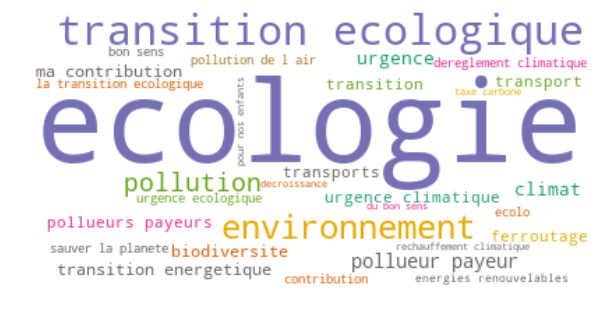

In [32]:
word_cloud(clean(reduced_dataset_df['title']))

As we can see, there are different grammatical and semantic variants of some words such as "ecologie". So, we have to reduce the imbalance of the data by projecting rare and unique
variants of the words on the same representation.

## Word cloud with * limmetized * words

In [33]:
lemm_titles=lemmetize(reduced_dataset_df['title'])
print(lemm_titles[0:10])

['transition', 'surpopulation', 'climat', 'pollution air', 'economie ecologie', 'égalité traitement', 'gardien terre passeur enfant', 'pollution planete', 'écotaxe compagnie aviation', 'ferroutage']


In [34]:
clean_titles=clean(lemm_titles)

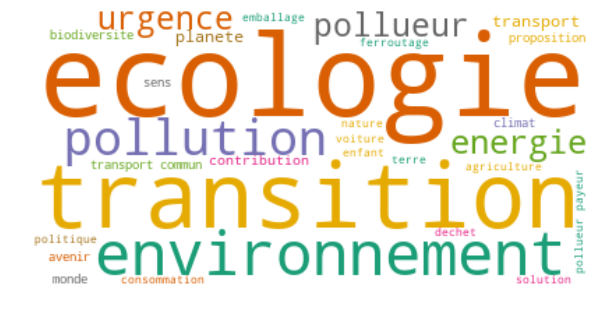

In [35]:
word_cloud(clean_titles)

##  Bigrams and trigrams * BEFORE * preprocessiing and removing stopwords

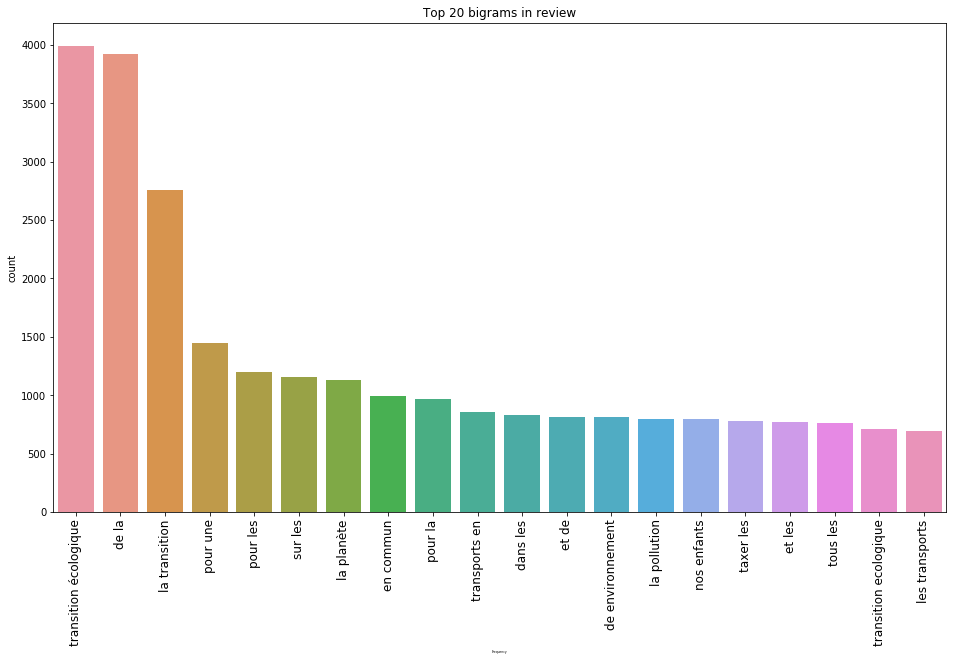

In [36]:
bigrams(reduced_dataset_df['title'], 20)

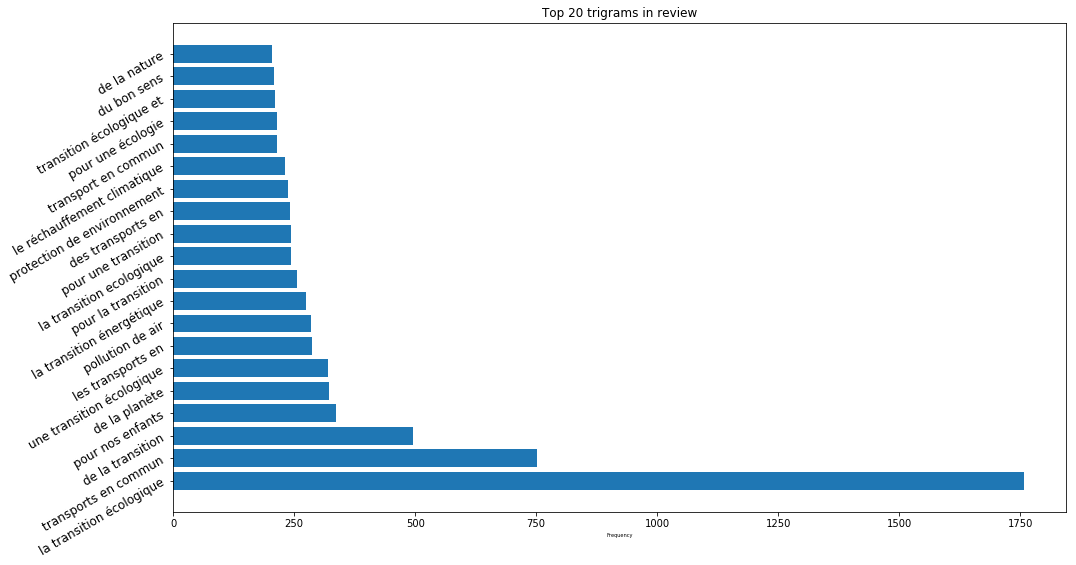

In [61]:
trigrams(reduced_dataset_df['title'], 20)

## Determine bigrams and trigrams * AFTER * preprocessiing and removing stopwords



In [38]:
reduced_dataset_df['clean_title'] = [' '.join(words) for words in filtered_titles]
reduced_dataset_df.head()

,authorZipCode,title,problems,reponse_probleme,clean_title
0,97231,transition écologique,nan,nan,transition ecologique
1,57000,La surpopulation,Les problèmes auxquels se trouve confronté l’e...,Les problèmes auxquels se trouve confronté l’e...,surpopulation
2,34140,climat,"Les dérèglements climatiques (crue, sécheresse)",pour éviter les inondations obliger les rivera...,climat
3,17400,POLLUTION AIR EAU,La pollution de l'air,Il faut taxer les gros pollueurs : Entreprises...,pollution air eau
4,35430,Economie vs Ecologie,La biodiversité et la disparition de certaines...,"Changer notre mode de vie, impulser une nouvel...",economie vs ecologie


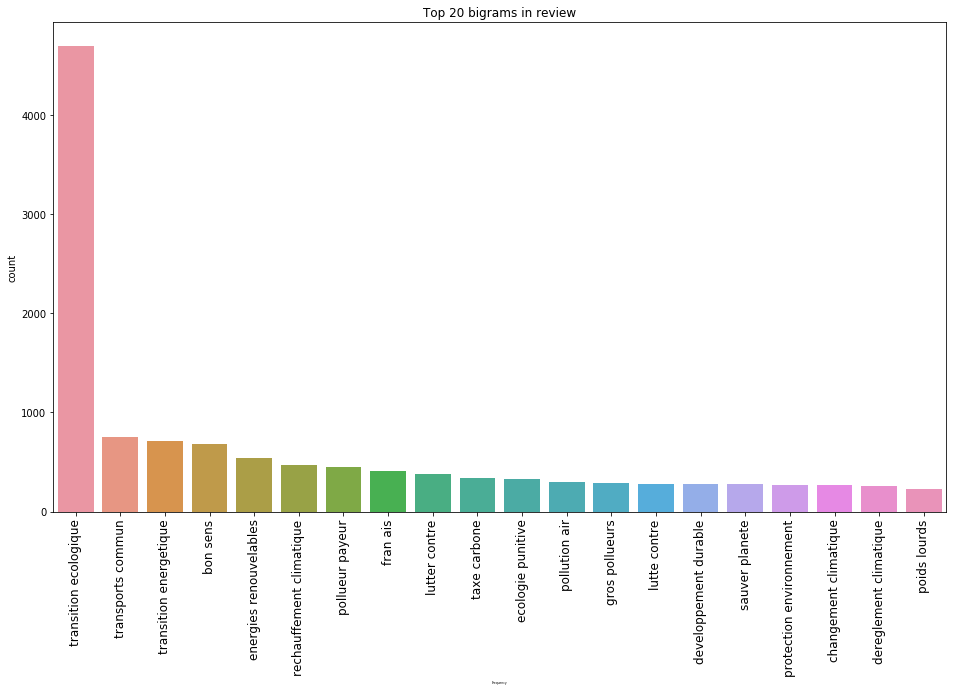

In [39]:
bigrams(reduced_dataset_df['clean_title'], 20)

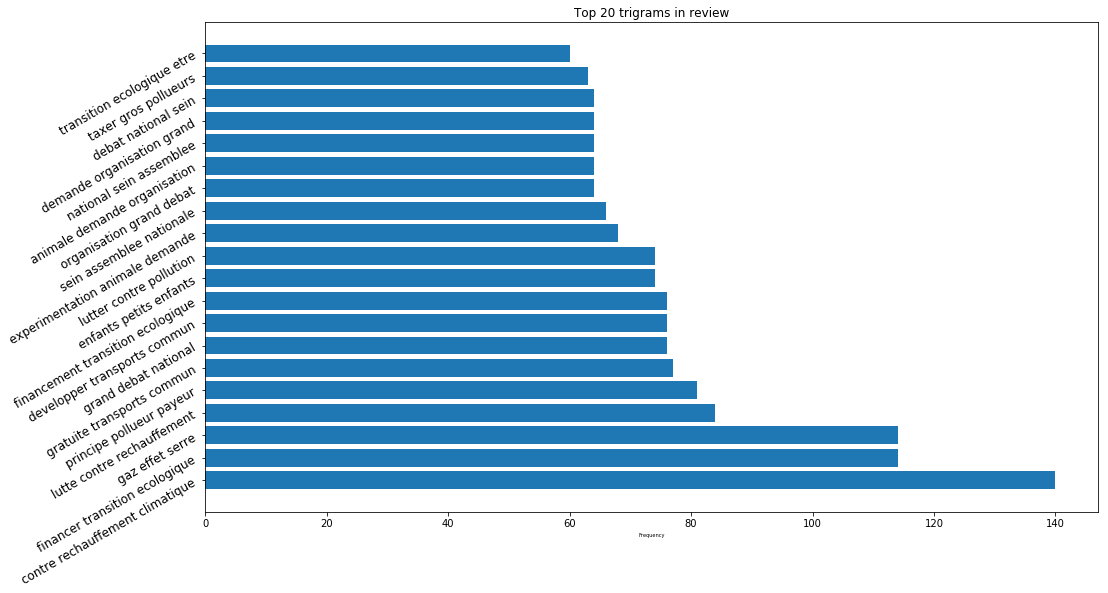

In [62]:
trigrams(reduced_dataset_df['clean_title'], 20)

**We can notice that we got more significant results after removing stoprwords** 

We notice that french people are aware about the importance of the 'transition écologique' with about 5000 response.

-----------------------------------------------------------------

<a class="anchor" id="7"></a> 

# 7.Analyse Problems Column :

In [41]:

tokenized_problems=tokenization(clean(reduced_dataset_df['problems']))
filtered_problems=removing_stopwords(tokenized_problems)

most_50_freq(filtered_problems)

[('climatiques', 23985), ('dereglements', 23956), ('secheresse', 22915), ('crue', 22837), ('pollution', 20732), ('air', 18329), ('biodiversite', 17878), ('disparition', 16936), ('especes', 16806), ('certaines', 16147), ('problemes', 2542), ('climatique', 2045), ('eau', 1796), ('toutes', 1593), ('dechets', 1524), ('probleme', 1468), ('environnement', 1373), ('erosion', 1336), ('lies', 1276), ('importants', 1206), ('dereglement', 1203), ('autres', 1203), ('sols', 1188), ('important', 1178), ('ensemble', 1140), ('lie', 1126), ('etre', 1114), ('littoral', 1079), ('ressources', 991), ('planete', 929), ('rechauffement', 913), ('terre', 811), ('meme', 802), ('propositions', 726), ('pesticides', 690), ('consommation', 674), ('produits', 663), ('energie', 631), ('ci', 620), ('vie', 611), ('dessus', 584), ('agriculture', 537), ('donc', 537), ('etc', 505), ('sante', 494), ('autre', 494), ('reponses', 493), ('points', 488), ('ecologique', 485), ('pollutions', 479)]


In [42]:

reduced_dataset_df['clean_problems'] = [' '.join(words) for words in filtered_problems]
reduced_dataset_df.head()

,authorZipCode,title,problems,reponse_probleme,clean_title,clean_problems
0,97231,transition écologique,nan,nan,transition ecologique,
1,57000,La surpopulation,Les problèmes auxquels se trouve confronté l’e...,Les problèmes auxquels se trouve confronté l’e...,surpopulation,problemes auxquels trouve confronte ensemble p...
2,34140,climat,"Les dérèglements climatiques (crue, sécheresse)",pour éviter les inondations obliger les rivera...,climat,dereglements climatiques crue secheresse
3,17400,POLLUTION AIR EAU,La pollution de l'air,Il faut taxer les gros pollueurs : Entreprises...,pollution air eau,pollution air
4,35430,Economie vs Ecologie,La biodiversité et la disparition de certaines...,"Changer notre mode de vie, impulser une nouvel...",economie vs ecologie,biodiversite disparition certaines especes


## Determine bigrams and trigrams * BEFORE * preprocessing for Problems

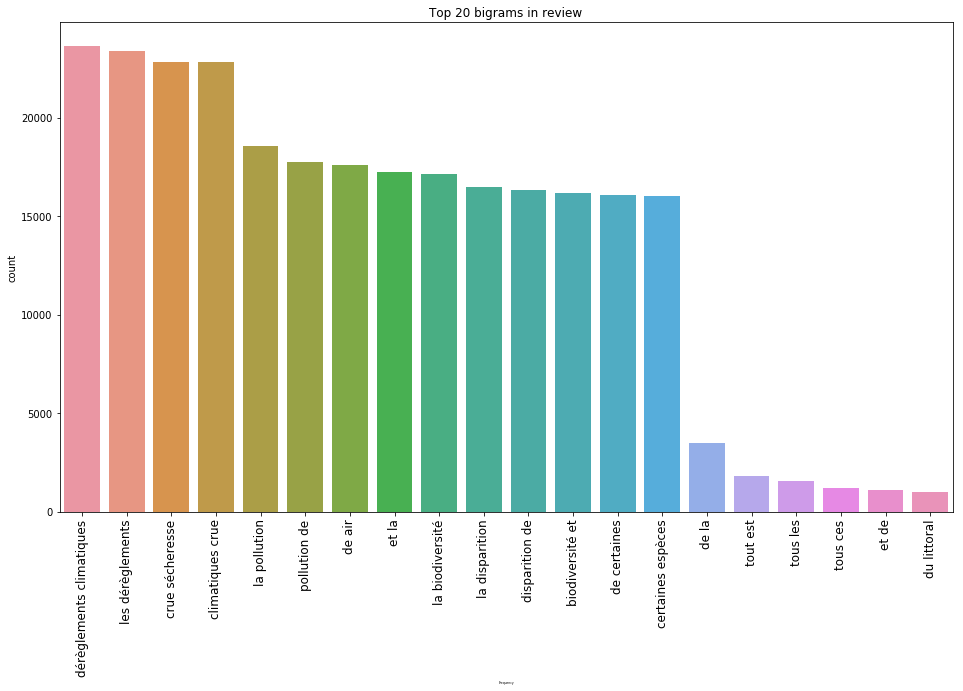

In [43]:
bigrams(reduced_dataset_df['problems'], 20)

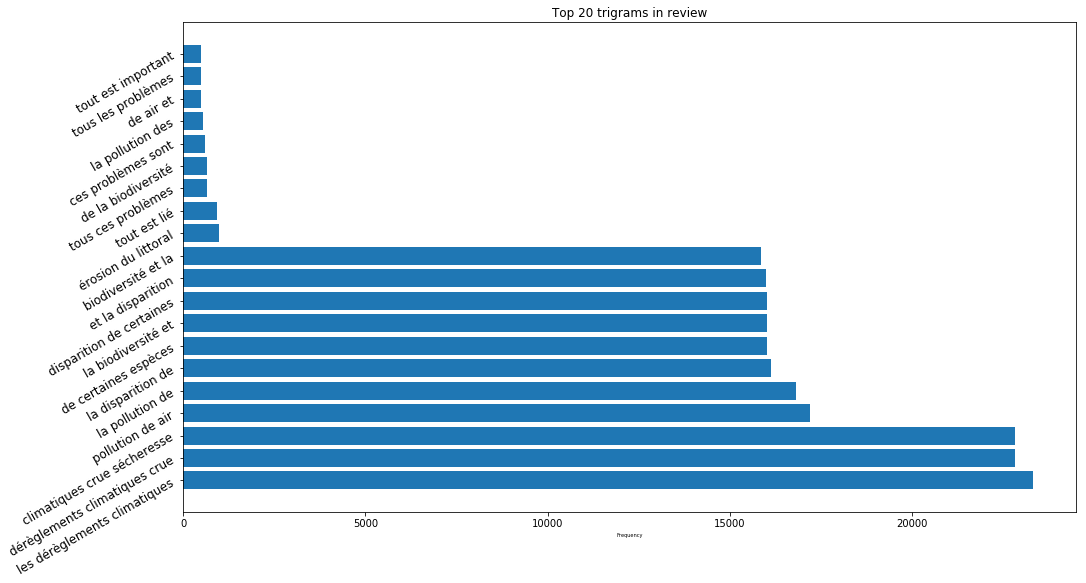

In [63]:
trigrams(reduced_dataset_df['problems'], 20)

## Determine bigrams and trigrams * AFTER * preprocessing for Problems

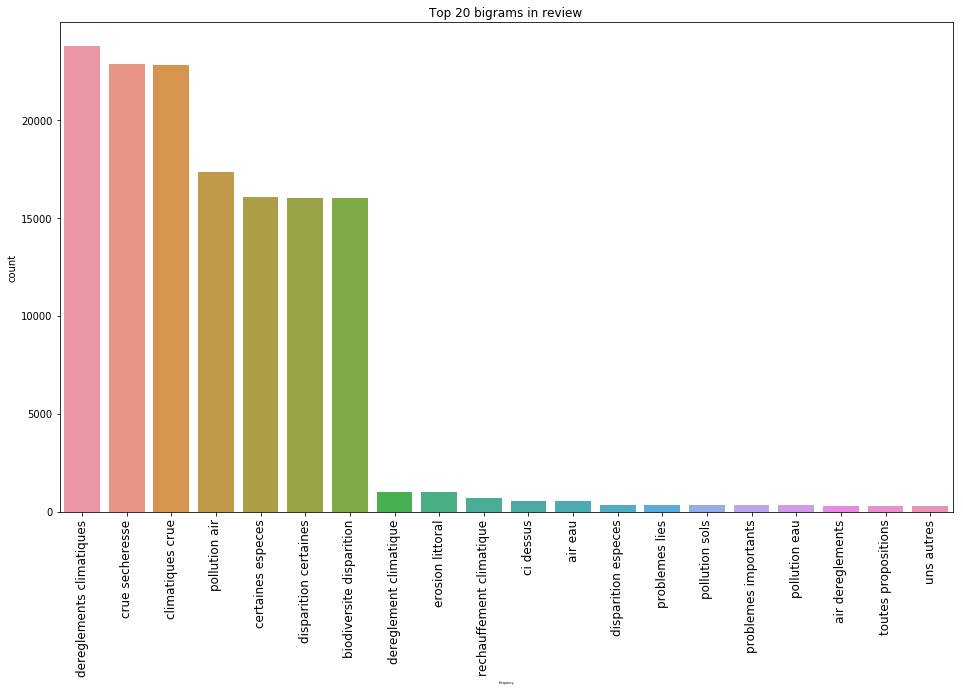

In [45]:
bigrams(reduced_dataset_df['clean_problems'], 20)

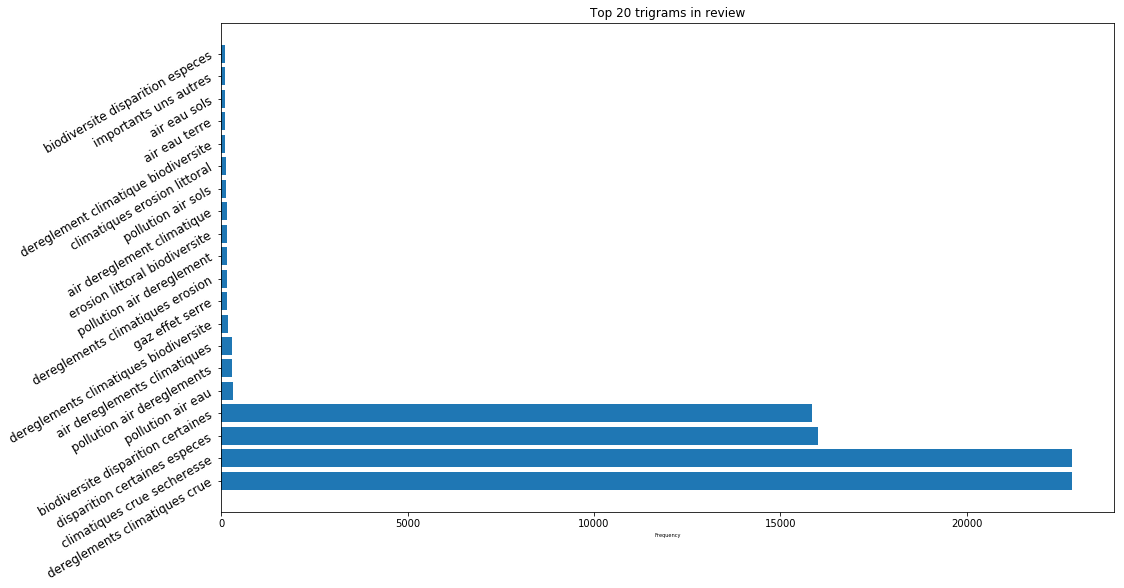

In [64]:
trigrams(reduced_dataset_df['clean_problems'], 20)

---------------------------------

<a class="anchor" id="8"></a> 

# 8. Analyse Response_problems Column :

In [47]:


clean_response=clean(reduced_dataset_df['reponse_probleme'])
tokenized_responses=tokenization(clean_response)
#print(tokenized_responses[0:10])
filtered_responses=removing_stopwords(tokenized_responses)


In [48]:
most_50_freq(filtered_responses)

[('produits', 15583), ('etre', 15076), ('transports', 11326), ('entreprises', 9788), ('developper', 9624), ('taxer', 9063), ('interdire', 8933), ('energie', 8645), ('france', 8624), ('consommation', 8414), ('pollution', 8218), ('agriculture', 8087), ('mettre', 8031), ('reduire', 7962), ('favoriser', 7905), ('production', 7861), ('transport', 7859), ('pays', 7760), ('ecologique', 7662), ('environnement', 7659), ('energies', 7573), ('exemple', 7376), ('vehicules', 7229), ('arreter', 7209), ('limiter', 6902), ('autres', 6836), ('place', 6797), ('meme', 6621), ('etc', 6125), ('transition', 5959), ('dechets', 5931), ('cette', 5919), ('etat', 5779), ('pesticides', 5776), ('niveau', 5597), ('eau', 5477), ('bio', 5382), ('tres', 5381), ('voiture', 5370), ('commun', 5340), ('donc', 5283), ('toutes', 5265), ('fran', 5125), ('politique', 5064), ('developpement', 4911), ('changer', 4907), ('vie', 4852), ('voitures', 4773), ('taxe', 4766), ('villes', 4721)]


In [49]:

reduced_dataset_df['clean_reponse_probleme'] = [' '.join(words) for words in filtered_responses]
reduced_dataset_df.head()

,authorZipCode,title,problems,reponse_probleme,clean_title,clean_problems,clean_reponse_probleme
0,97231,transition écologique,nan,nan,transition ecologique,,
1,57000,La surpopulation,Les problèmes auxquels se trouve confronté l’e...,Les problèmes auxquels se trouve confronté l’e...,surpopulation,problemes auxquels trouve confronte ensemble p...,problemes auxquels trouve confronte ensemble p...
2,34140,climat,"Les dérèglements climatiques (crue, sécheresse)",pour éviter les inondations obliger les rivera...,climat,dereglements climatiques crue secheresse,eviter inondations obliger riverains communes ...
3,17400,POLLUTION AIR EAU,La pollution de l'air,Il faut taxer les gros pollueurs : Entreprises...,pollution air eau,pollution air,taxer gros pollueurs entreprises bateaux march...
4,35430,Economie vs Ecologie,La biodiversité et la disparition de certaines...,"Changer notre mode de vie, impulser une nouvel...",economie vs ecologie,biodiversite disparition certaines especes,changer mode vie impulser nouvelle economie ag...


In [50]:
most_50_freq(filtered_responses)


[('produits', 15583), ('etre', 15076), ('transports', 11326), ('entreprises', 9788), ('developper', 9624), ('taxer', 9063), ('interdire', 8933), ('energie', 8645), ('france', 8624), ('consommation', 8414), ('pollution', 8218), ('agriculture', 8087), ('mettre', 8031), ('reduire', 7962), ('favoriser', 7905), ('production', 7861), ('transport', 7859), ('pays', 7760), ('ecologique', 7662), ('environnement', 7659), ('energies', 7573), ('exemple', 7376), ('vehicules', 7229), ('arreter', 7209), ('limiter', 6902), ('autres', 6836), ('place', 6797), ('meme', 6621), ('etc', 6125), ('transition', 5959), ('dechets', 5931), ('cette', 5919), ('etat', 5779), ('pesticides', 5776), ('niveau', 5597), ('eau', 5477), ('bio', 5382), ('tres', 5381), ('voiture', 5370), ('commun', 5340), ('donc', 5283), ('toutes', 5265), ('fran', 5125), ('politique', 5064), ('developpement', 4911), ('changer', 4907), ('vie', 4852), ('voitures', 4773), ('taxe', 4766), ('villes', 4721)]


## Determine bigrams and trigrams *** BEFORE *** preprocessing for Response_problems

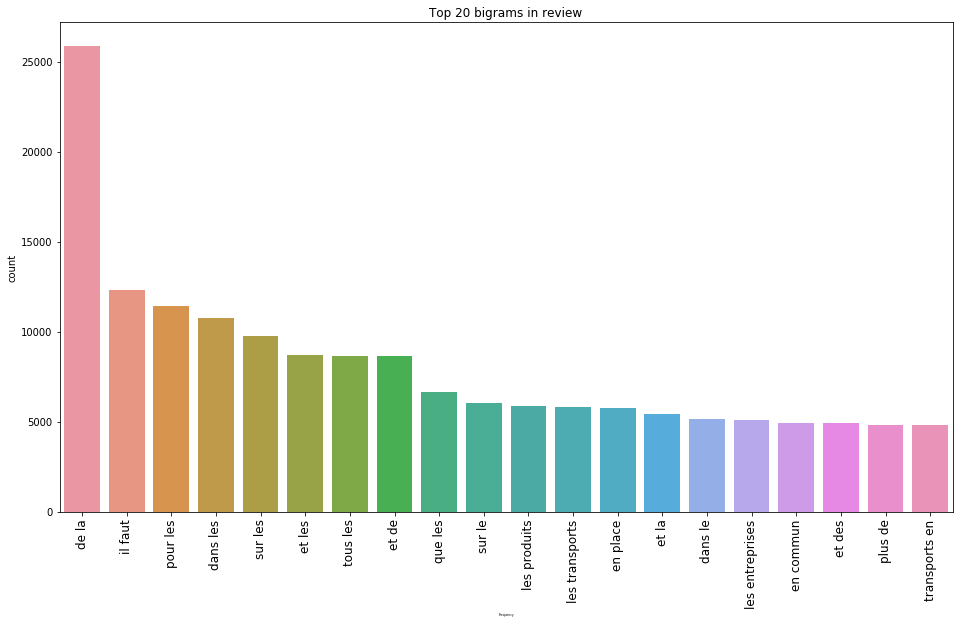

In [51]:
bigrams(reduced_dataset_df['reponse_probleme'], 20)

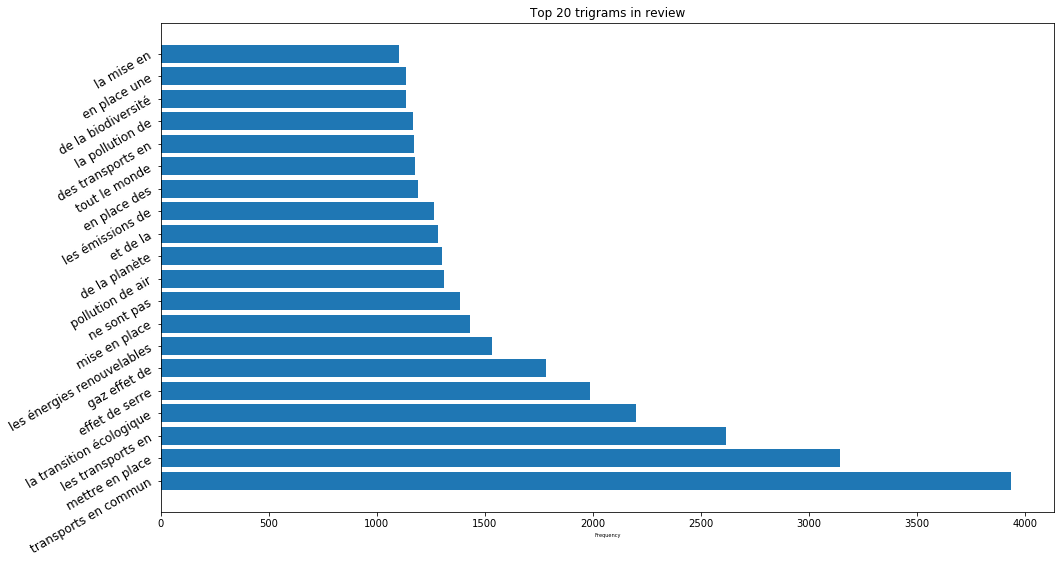

In [65]:
trigrams(reduced_dataset_df['reponse_probleme'], 20)

## Determine bigrams and trigrams *** AFTER *** preprocessing for Response_problems

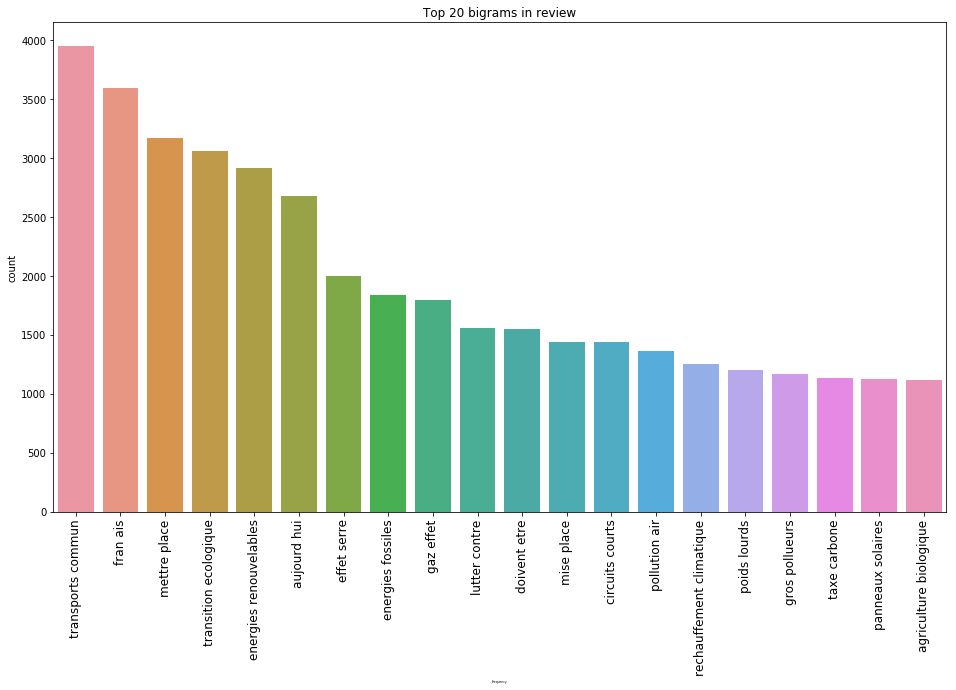

In [53]:
bigrams(reduced_dataset_df['clean_reponse_probleme'], 20)

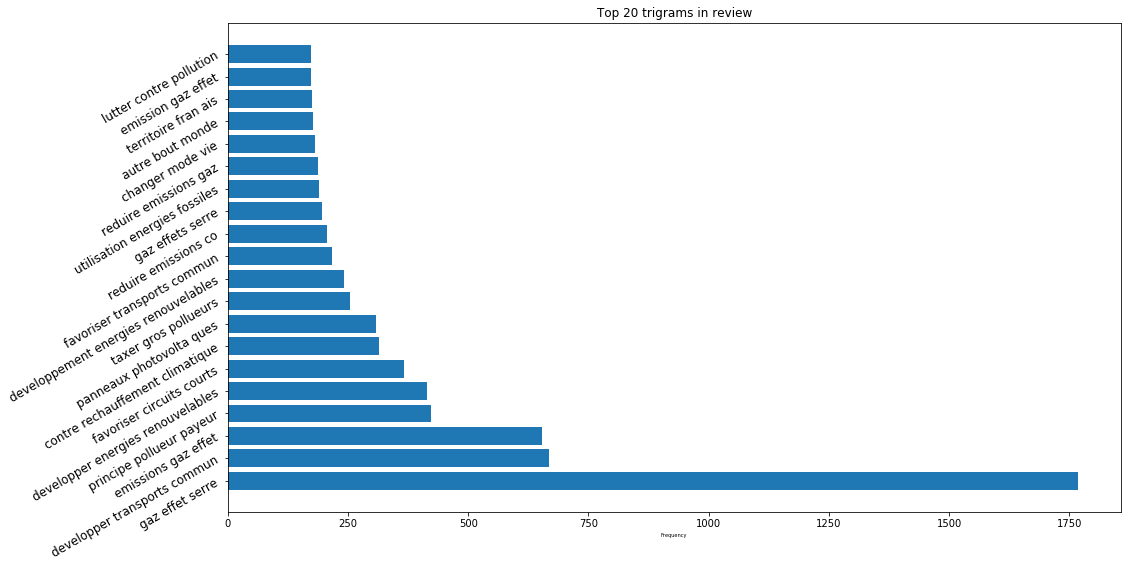

In [67]:
trigrams(reduced_dataset_df['clean_reponse_probleme'], 20)

___________________________